In [1]:
%matplotlib inline
from IPython.display import Image
import os
import numpy as np
import matplotlib.pyplot as plt

import flopy

#Set the paths
datapth = os.path.join('..', 'test-swr', 'swr010')

In [2]:
sobj = flopy.utils.SwrStage(os.path.join(datapth, 'rewet1D.stg'))
ts = sobj.get_ts(irec=0)
tsd = sobj.get_ts(irec=20)

sobj0 = flopy.utils.SwrStage(os.path.join(datapth, '.cmp', 'rewet1D.stg.cmp'))
ts0 = sobj0.get_ts(irec=0)
tsd0 = sobj0.get_ts(irec=20)

totim = ts['totim']

In [3]:
qobj = flopy.utils.SwrBudget(os.path.join(datapth, 'rewet1D.flow'))
tsq = qobj.get_ts(irec=0)
tsqd = qobj.get_ts(irec=20)
print(tsq.dtype)

[('totim', '<f8'), ('stage', '<f8'), ('qsflow', '<f8'), ('qlatflow', '<f8'), ('quzflow', '<f8'), ('rain', '<f8'), ('evap', '<f8'), ('qbflow', '<f8'), ('qeflow', '<f8'), ('qexflow', '<f8'), ('qbcflow', '<f8'), ('qcrflow', '<f8'), ('dv', '<f8'), ('inf-out', '<f8'), ('volume', '<f8')]


#### Plot the data from the binary SWR Process stage file

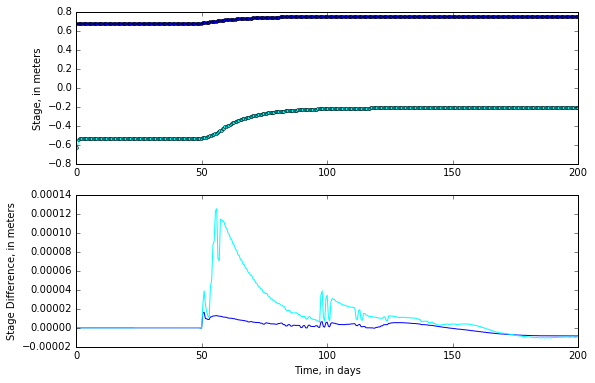

In [4]:
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(2, 1, 1)
ax.plot(totim, ts['stage'], color='blue')
ax.plot(totim, ts0['stage'], color='blue', lw=0, marker='o', ms=3)
ax.plot(totim, tsd['stage'], color='cyan')
ax.plot(totim, tsd0['stage'], color='cyan', lw=0, marker='o', ms=3)
ax.set_ylabel('Stage, in meters')

ax = fig.add_subplot(2, 1, 2)
ax.plot(totim, ts['stage']-ts0['stage'], color='blue')
ax.plot(totim, tsd['stage']-tsd0['stage'], color='cyan')
ax.set_ylabel('Stage Difference, in meters')
ax.set_xlabel('Time, in days')

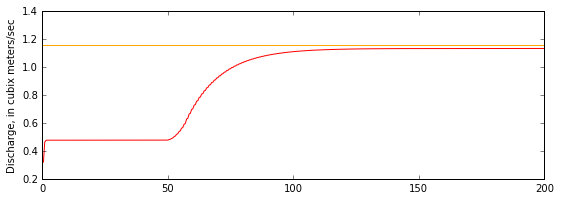

In [5]:
fig = plt.figure(figsize=(9, 3))
ax = fig.add_subplot(1, 1, 1)
ax.set_ylim(0.2, 1.4)
ax.plot(totim, tsq['qlatflow']/86400., color='orange')
ax.plot(totim, -tsqd['qbcflow']/86400., color='red')
ax.set_ylabel('Discharge, in cubix meters/sec')


In [6]:
cells = [(2,0,0), (2,0,20)]
hobj = flopy.utils.HeadFile(os.path.join(datapth, 'rewet1D.hds'))
hts = hobj.get_ts(cells)

hobj0 = flopy.utils.HeadFile(os.path.join(datapth, '.cmp','rewet1D.hds.cmp'))
hts0 = hobj0.get_ts(cells)

#### Plot the data from the binary head file

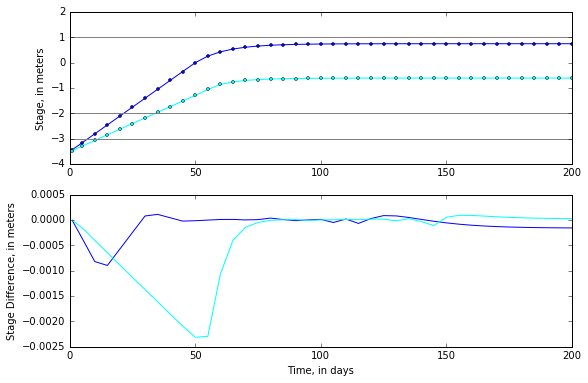

In [7]:
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(2, 1, 1)
ax.set_ylim(-4, 2)
ax.plot(hts[:, 0], hts[:, 1], color='blue')
ax.plot(hts0[:, 0], hts0[:, 1], color='blue', lw=0, marker='o', ms=3)
ax.plot(hts[:, 0], hts[:, 2], color='cyan')
ax.plot(hts0[:, 0], hts0[:, 2], color='cyan', lw=0, marker='o', ms=3)
ax.plot([0,200], [1,1], color='0.5')
ax.plot([0,200], [-2,-2], color='0.5')
ax.plot([0,200], [-3,-3], color='0.5')
ax.set_ylabel('Stage, in meters')

ax = fig.add_subplot(2, 1, 2)
ax.plot(hts[:, 0], (hts[:, 1]-hts0[:, 1]), color='blue')
ax.plot(hts[:, 0], (hts[:, 2]-hts0[:, 2]), color='cyan')
ax.set_ylabel('Stage Difference, in meters')
ax.set_xlabel('Time, in days')